In [2]:
library(tidyverse)
library(data.table)

## 마이크로펨 미세먼지 개인, 실내, 실외 측정값 비교

In [5]:
##################### 마이크로펨 개인, 실내, 실외 비교 ##################

# 날짜 setting
week <- "1" # 변경
date <- "230623" # 변경
week_date <- paste0("여름_",week,"주차_",date)
path_raw <- paste0(week_date,"/raw_data_files_",date)
path_rev <- paste0(week_date,"/rev_data_files_",date)
path_merge <- paste0(week_date,"/merged_data_",date)
path_EDA <- paste0(week_date,"/EDA_",date)

#setwd(paste0("C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/2023년 p3 수집/", path_merge))
setwd(paste0("C:/Users/soyou/Dropbox/미세먼지건강영향평가/2023년 p3 수집/", path_merge))

df <- fread('2023_micropem_summer_week1.csv')
df_mean <- aggregate(rawneph ~ Name+Platfm+date_time, df, mean)

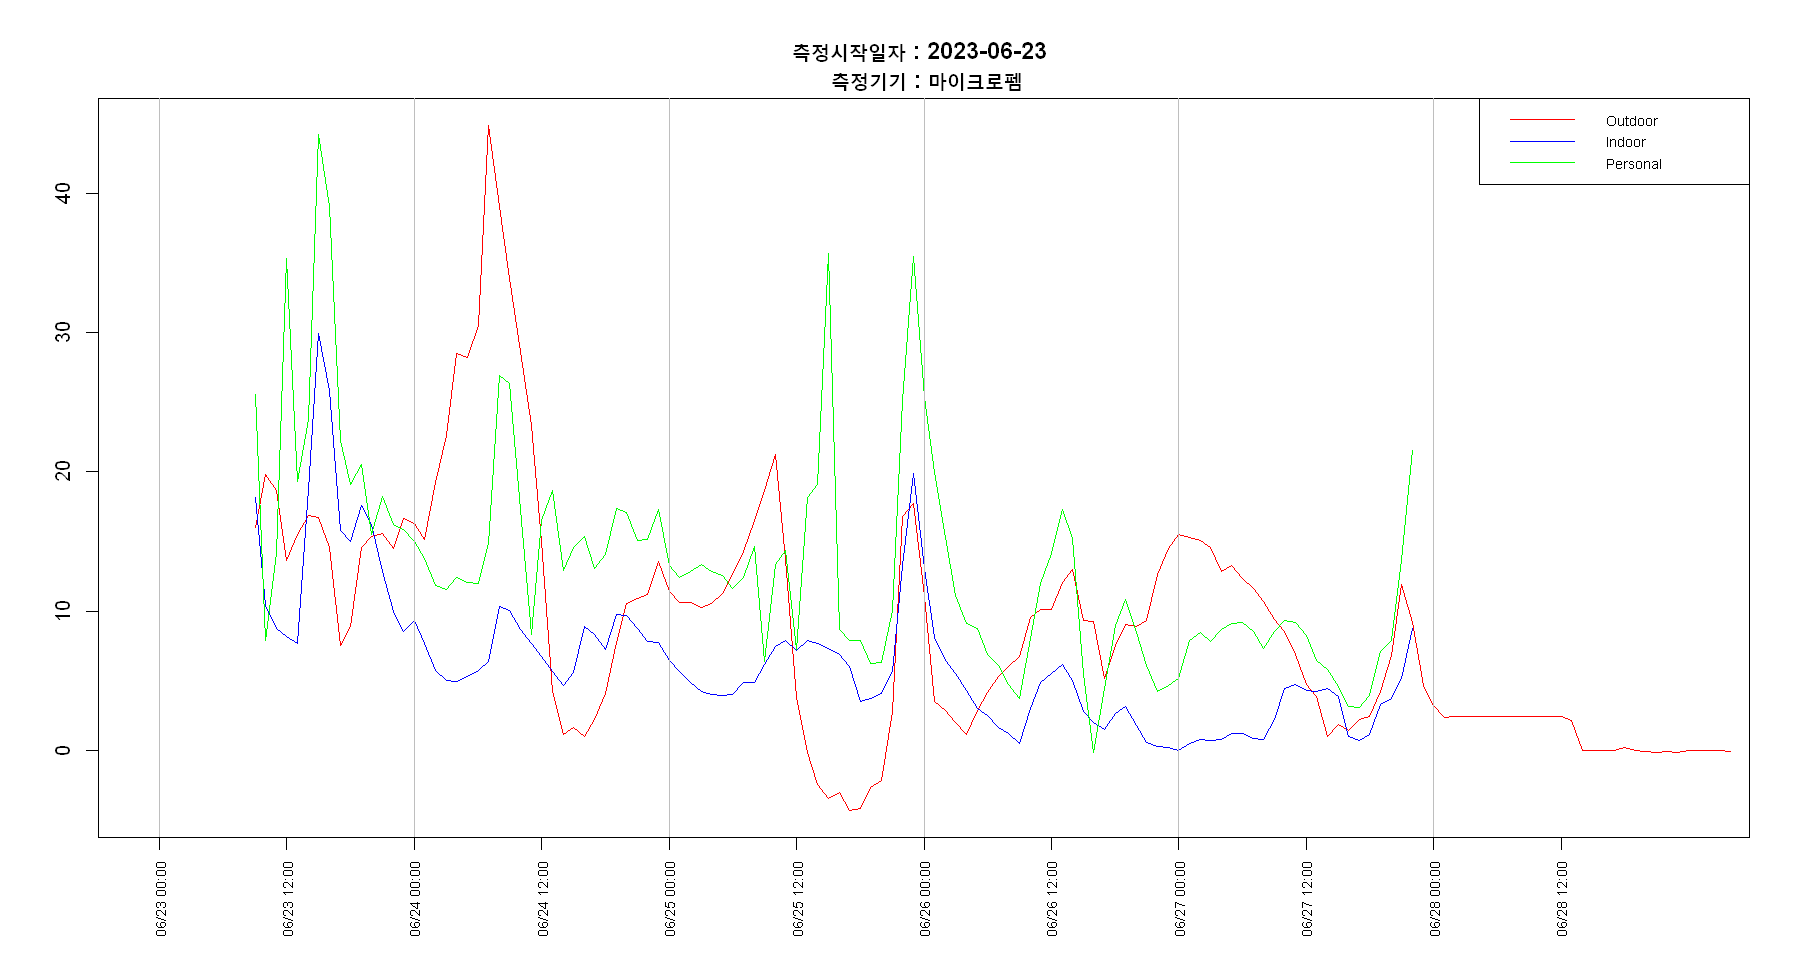

In [11]:
library(repr)
options(repr.plot.width=15, repr.plot.height=8)

name <- "엄정순"
start_date <- "2023-06-23" #변경
end_date <- "2023-06-28"  #변경
df_id <- df_mean[df_mean$Name == name,]
range <- c(min(df_id$rawneph, na.rm = T),max(df_id$rawneph, na.rm = T))
plot(df_id[df_id$Platfm == "O",]$date_time, df_id[df_id$Platfm == "O",]$rawneph, type = 'l',
       ylim = range, xlim = as.POSIXct(c(paste(start_date, "00:00:00"), paste(end_date, "23:59:59")),tz = 'UTC')
       ,xlab = "", ylab = "", xaxt = "n",col = "red", main = paste("\n측정시작일자 :", start_date, "\n 측정기기 : 마이크로펨"))
lines(df_id[df_id$Platfm == "I",]$date_time, df_id[df_id$Platfm == "I",]$rawneph, col = "blue")
lines(df_id[df_id$Platfm == "P",]$date_time, df_id[df_id$Platfm == "P",]$rawneph, col = "green")
legend(x = "topright", legend = c("Outdoor", "Indoor","Personal" ), col = c("red", "blue", "green"), 
         lty = c(1,1,1),lwd = c(1.5, 1.5,1.5),cex = 0.7)
abline(v = seq(as.POSIXct(paste(start_date, "00:00:00"), tz='UTC'), as.POSIXct(paste(end_date, "23:59:59"),tz='UTC'), by = "24 hour"), col = "gray")
axis.POSIXct(1, at = seq(as.POSIXct(paste(start_date, "00:00:00"), tz='UTC'), as.POSIXct(paste(end_date, "23:59:59"), tz = 'UTC'), by = "12 hour"), 
               format = "%m/%d %H:%M", las = 2, cex.axis = 0.7)

## 마이크로펨 실내 측정값 vs 퍼플에어 실내 측정값 비교

In [13]:
week <- "1" # 변경
date <- "230623" # 변경
week_date <- paste0("여름_",week,"주차_",date)
path_mi_merged <- paste0(week_date,"/merged_data_",date)
path_mi_eda <- paste0(week_date,"/EDA_",date)
path_pa_merged <- paste0('purple_air_',date,'/merged_data_',date)

# 마이크로펨 파일 불러오기
#setwd(paste0("C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/2023년 p3 수집/", path_mi_merged))
setwd(paste0("C:/Users/soyou/Dropbox/미세먼지건강영향평가/2023년 p3 수집/", path_mi_merged))
mi <- fread(paste0('2023_micropem_summer_week',week,'.csv'))
head(mi)

# 퍼플에어 파일 불러오기
#setwd(paste0("C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/퍼플에어/",path_pa_merged))
setwd(paste0("C:/Users/soyou/Dropbox/미세먼지건강영향평가/퍼플에어/",path_pa_merged))
pa <- fread(paste0('purple_air_',date,'.csv'))
head(pa)

# 마이크로펨/퍼플에어 실내데이터 존재하는 대상 확인
mi_name <- unique(mi[mi$Platfm == "I"]$Name)
pa_name <- unique(pa$ID)

Date,Time,rawneph,Temp,RH,FilterID,hour,time_new,date_time,Name,UPSN,Platfm
<IDate>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dttm>,<chr>,<chr>,<chr>
2023-06-23,09:40:10,13.413,30.4,67.1,KEE1003,9,09:00:00,2023-06-23 09:00:00,엄정순,MTL1010033,O
2023-06-23,09:40:20,17.937,NA,66.9,KEE1003,9,09:00:00,2023-06-23 09:00:00,엄정순,MTL1010033,O
2023-06-23,09:40:30,17.789,NA,67.4,KEE1003,9,09:00:00,2023-06-23 09:00:00,엄정순,MTL1010033,O
2023-06-23,09:40:40,13.318,30.4,67.6,KEE1003,9,09:00:00,2023-06-23 09:00:00,엄정순,MTL1010033,O
2023-06-23,09:40:50,17.692,NA,67.8,KEE1003,9,09:00:00,2023-06-23 09:00:00,엄정순,MTL1010033,O
2023-06-23,09:41:00,10.990,NA,68.2,KEE1003,9,09:00:00,2023-06-23 09:00:00,엄정순,MTL1010033,O


UTCDateTime,mac_address,current_temp_f,current_humidity,pressure,pm2_5_cf_1,pm2_5_atm,pm2_5_cf_1_b,pm2_5_atm_b,ID,hour,date,time,time_new,date_time,mean_cf1,mean_atm,corrected_cf1
<dttm>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<IDate>,<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>
2023-06-23 09:01:50,bc:ff:4d:32:65:39,83,51,1009.29,54.60,42.93,52.15,41.90,박종석,9,2023-06-23,09:01:50,09:00:00,2023-06-23 09:00:00,53.375,42.415,29.1190
2023-06-23 09:03:50,bc:ff:4d:32:65:39,83,51,1009.37,52.41,42.14,50.87,41.42,박종석,9,2023-06-23,09:03:50,09:00:00,2023-06-23 09:00:00,51.640,41.780,28.2168
2023-06-23 09:05:50,bc:ff:4d:32:65:39,84,51,1009.35,51.56,41.66,49.42,40.63,박종석,9,2023-06-23,09:05:50,09:00:00,2023-06-23 09:00:00,50.490,41.145,27.6188
2023-06-23 09:07:50,bc:ff:4d:32:65:39,84,50,1009.32,52.95,42.51,49.81,40.78,박종석,9,2023-06-23,09:07:50,09:00:00,2023-06-23 09:00:00,51.380,41.645,28.1676
2023-06-23 09:09:50,bc:ff:4d:32:65:39,85,49,1009.33,56.50,43.83,53.37,42.87,박종석,9,2023-06-23,09:09:50,09:00:00,2023-06-23 09:00:00,54.935,43.350,30.1022
2023-06-23 09:11:50,bc:ff:4d:32:65:39,85,49,1009.28,51.35,41.72,50.78,41.49,박종석,9,2023-06-23,09:11:50,09:00:00,2023-06-23 09:00:00,51.065,41.605,28.0898


In [14]:
######################### 일자별 1시간 단위 평균 ############################
# 마이크로펨 실내 데이터 일자별 1시간 단위 평균 데이터
mi_I <- mi %>% filter(Platfm == "I")
mi_day <- aggregate(rawneph ~ Name+date_time, data = mi_I, mean) %>% arrange(Name)
mi_day$date_time_c <- as.character(mi_day$date_time)

# 퍼플에어 데이터 1시간 단위 평균값 
pa_day <- aggregate(cbind(mean_cf1, mean_atm, corrected_cf1) ~ ID+date_time,
                    data = pa, mean) %>% arrange(ID)
pa_day$date_time_c <- as.character(pa_day$date_time)

# correlation 확인

cor_list <- intersect(mi_name, pa_name)
corlist_1 <- c()
corlist_2 <- c()
corlist_3 <- c()
for (i in 1:length(cor_list)){
  mi_id <- mi_day[mi_day$Name == cor_list[i],]
  pa_id <- pa_day[pa_day$ID == cor_list[i],] 
  merge_id <- full_join(mi_id, pa_id, by = c("Name" = "ID","date_time_c" = "date_time_c")) %>%
    select(Name, date_time_c, rawneph, mean_cf1, mean_atm, corrected_cf1)
  merge_id$date_time_c <- as.POSIXct(merge_id$date_time_c)
  merge_id_cor <- na.omit(merge_id)
  
  corlist_1[i]<- cor(merge_id_cor$rawneph,merge_id_cor$corrected_cf1)
  corlist_2[i]<- cor(merge_id_cor$rawneph,merge_id_cor$mean_cf1)
  corlist_3[i]<- cor(merge_id_cor$rawneph,merge_id_cor$mean_atm)
  
}
p <- data.frame(cor_list, corlist_1, corlist_2, corlist_3)
names(p) <- c("Name", "corrected_cf1", "mean_cf1", "mean_atm")
p

Name,corrected_cf1,mean_cf1,mean_atm
<chr>,<dbl>,<dbl>,<dbl>
엄정순,0.8859283,0.8836602,0.8447310
황명숙,0.9495584,0.9472246,0.9159279
이금순,0.5615595,0.5952210,0.5336123
손미숙,0.8268325,0.8261683,0.7937667
이명옥,0.9360446,0.9675879,0.9358643
박종석,0.6270086,0.6203903,0.6224479


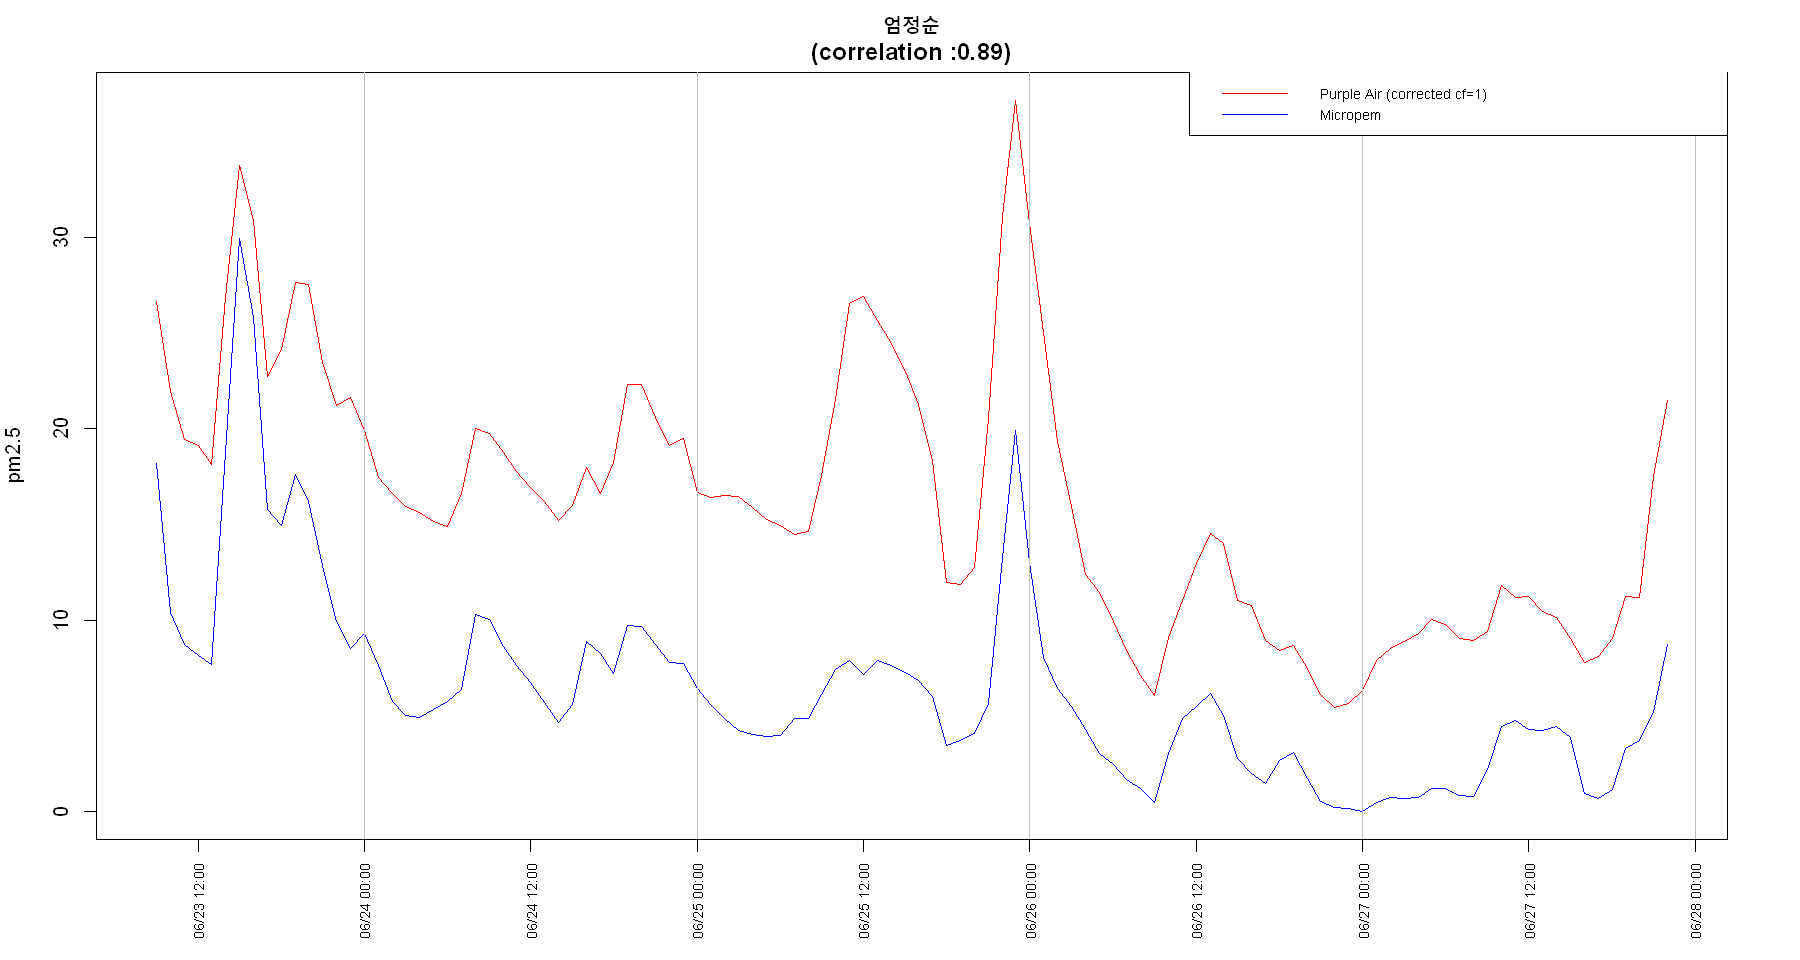

In [22]:
# 대상별
name <- "엄정순"
mi_id <- mi_day[mi_day$Name == name,]
pa_id <- pa_day[pa_day$ID == name,] 
merge_id <- full_join(mi_id, pa_id, by = c("Name" = "ID","date_time_c" = "date_time_c")) %>%
  select(Name, date_time_c, rawneph, mean_cf1, mean_atm, corrected_cf1)
merge_id$date_time_c <- as.POSIXct(merge_id$date_time_c)
merge_id_cor <- na.omit(merge_id)

# create margin around plot

start_date <- "2023-06-23" #변경
end_date <- "2023-06-28"  #변경

par(mar = c(5, 4, 3, 3), xpd = FALSE)
cor <- round(cor(merge_id_cor$rawneph,merge_id_cor$corrected_cf1),2)
all <- c(merge_id$rawneph, merge_id$corrected_cf1)
range <- c(min(all, na.rm = T),max(all, na.rm = T))
plot(merge_id$date_time_c, merge_id$corrected_cf1, type = "l", xlab = "", ylab = "pm2.5", 
     col = 'red', lwd = 1, xaxt = "n",ylim = range, 
     main = paste0(name, "\n(correlation :", cor,")"))
lines(merge_id$date_time_c, merge_id$rawneph, col = 'blue')

abline(v = seq(as.POSIXct(paste(start_date, "00:00:00")), as.POSIXct(paste(end_date, "23:59:59")), by = "24 hour"), col = "gray")
legend(x = "topright", legend = c("Purple Air (corrected cf=1)", "Micropem"), col = c("red", "blue"), 
       lty = c(1,1),lwd = c(1.2, 1.2),cex = 0.7)
axis.POSIXct(1, at = seq(as.POSIXct(paste(start_date, "00:00:00"), tz = "Asia/Seoul"), as.POSIXct(paste(end_date, "23:59:59"),tz = "Asia/Seoul"), by = "12 hour"), 
             format = "%m/%d %H:%M", las = 2, cex.axis = 0.7)